In [ ]:
# Now just make this into like an essay format, putting the correlation matrix before the graphs and explaining
# the significance. Make sure to include all strokes gained stuff and compare in some sort of visualization or
# shortened correlation matrix

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler as SS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import statistics
from statistics import mean
import seaborn as sns

In [ ]:
# Reading and viewing the data

In [3]:
golf = pd.read_csv('pgaTourData.csv')

In [4]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [5]:
# Cleaning the data

In [6]:
golf['Money'] = golf['Money'].str.replace(',','').str.replace('$', '')

In [7]:
golf['Points'] = golf['Points'].str.replace(',','')

In [8]:
golf['gir'].fillna(0, inplace=True)
golf['Money'].fillna(0, inplace=True)
golf['SG:OTT'].fillna(0, inplace = True)

/tmp/ipykernel_47/1413172577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  golf['gir'].fillna(0, inplace=True)
/tmp/ipykernel_47/1413172577.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [9]:
golf = golf.astype(int, errors='ignore')

In [10]:
golf = golf.rename(columns={"Average Putts": "AVG_Putts"})

In [11]:
golf = golf[golf['gir'] != 0]

In [12]:
golf_no_names = golf.drop(columns = "Player Name")

In [13]:
# Identifying the data types

In [14]:
golf_no_names.dtypes

Rounds                float64
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
AVG_Putts             float64
Average Scrambling    float64
Average Score         float64
Points                 object
Wins                  float64
Top 10                float64
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                   int64
dtype: object

In [15]:
# Identifying the null data

In [16]:
golf_no_names.isnull().sum()

Rounds                   0
Fairway Percentage       0
Year                     0
Avg Distance             0
gir                      0
AVG_Putts                0
Average Scrambling       0
Average Score            0
Points                   4
Wins                  1395
Top 10                 325
Average SG Putts         0
Average SG Total         0
SG:OTT                   0
SG:APR                   0
SG:ARG                   0
Money                    0
dtype: int64

In [17]:
# Finding the correlation coefficients

In [18]:
golf_no_names.corr()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,AVG_Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Rounds,1.000000,0.083597,0.078522,0.069599,0.252190,-0.125943,0.227928,-0.313380,0.364636,-0.097741,0.211198,0.173218,0.317011,0.164208,0.192764,0.112364,0.281027
Fairway Percentage,0.083597,1.000000,-0.111042,-0.533832,0.343115,0.162757,0.236281,-0.170017,0.032302,-0.098652,0.024990,-0.043493,0.162458,0.179032,0.155015,0.000356,0.017870
Year,0.078522,-0.111042,1.000000,0.221102,-0.000044,-0.145524,0.107181,-0.006801,0.057549,0.057845,0.076327,0.023785,0.029939,0.003330,0.009928,0.035493,0.107282
Avg Distance,0.069599,-0.533832,0.221102,1.000000,0.292965,0.167314,-0.228979,-0.273230,0.281107,0.247126,0.226512,-0.136676,0.278923,0.604456,0.142217,-0.191637,0.325609
gir,0.252190,0.343115,-0.000044,0.292965,1.000000,0.549402,0.038068,-0.485030,0.303183,0.267357,0.276390,-0.231629,0.487778,0.582466,0.577074,-0.103955,0.314813
AVG_Putts,-0.125943,0.162757,-0.145524,0.167314,0.549402,1.000000,-0.549805,0.263041,-0.282488,-0.209932,-0.245181,-0.720328,-0.265734,0.293925,0.133635,-0.449081,-0.257001
Average Scrambling,0.227928,0.236281,0.107181,-0.228979,0.038068,-0.549805,1.000000,-0.518057,0.344421,0.248329,0.311253,0.458220,0.517527,-0.024871,0.196124,0.613776,0.318738
Average Score,-0.313380,-0.170017,-0.006801,-0.273230,-0.485030,0.263041,-0.518057,1.000000,-0.763993,-0.477661,-0.700529,-0.364817,-0.962318,-0.530624,-0.669370,-0.390284,-0.743698
Points,0.364636,0.032302,0.057549,0.281107,0.303183,-0.282488,0.344421,-0.763993,1.000000,0.760674,0.814762,0.297614,0.761594,0.437439,0.521278,0.284049,0.949286
Wins,-0.097741,-0.098652,0.057845,0.247126,0.267357,-0.209932,0.248329,-0.477661,0.760674,1.000000,0.446548,0.216024,0.470284,0.244059,0.348876,0.217539,0.723865


In [19]:
# Look at Average Score on the correlation matrix 

# Average Score	-0.313380	-0.170017	-0.006801	-0.273230	-0.485030	0.263041	-0.518057	1.000000	-0.763993	-0.477661	-0.700529	-0.364817	-0.962318	-0.530624	-0.669370	-0.390284	-0.743698

In [20]:
# Creating the predictors and the target

In [21]:
X = golf[["gir", 'SG:OTT']]
X = X.astype(float, errors='ignore')
X

,gir,SG:OTT
0,73.51,0.427
1,68.22,-0.012
2,68.67,0.183
3,68.80,0.406
4,67.12,-0.227
...,...,...
1673,65.13,0.185
1674,65.66,0.336
1675,65.88,-0.538
1676,61.64,-0.307


In [22]:
X = np.array(X)
X

array([[ 7.351e+01,  4.270e-01],
       [ 6.822e+01, -1.200e-02],
       [ 6.867e+01,  1.830e-01],
       ...,
       [ 6.588e+01, -5.380e-01],
       [ 6.164e+01, -3.070e-01],
       [ 6.479e+01, -2.230e-01]])

In [23]:
y = golf['Money']
y = np.array(y)
y

array([2680487, 2485203, 2700018, ...,  937987,  311405,  318673])

In [24]:
y = y.astype(float)

In [25]:
# Defining the do_Kfold function

In [26]:
def do_Kfold(model, X, y, k, scaler = None, random_state = 146):

    from sklearn.model_selection import KFold

    kf = KFold(n_splits = k, random_state = random_state, shuffle = True)

    train_scores = []
    test_scores = []
    model_coefficients = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, : ]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        
        model.fit(Xtrain,ytrain) # then in this iteration of the for loop, a regression model is fit to

        train_scores.append(model.score(Xtrain, ytrain))
        test_scores.append(model.score(Xtest, ytest))
        model_coefficients.append(model.coef_)

        avg_training_score = np.mean(train_scores)
        avg_testing_score = np.mean(test_scores)
        best_coefficients = model_coefficients[test_scores.index(np.max(test_scores))]



    return print(f"For {k} models produced, ", "\n", "The average training score is: ", avg_training_score, "\n", "The average testing score is: ", avg_testing_score, "\n", f"The model that performs the best (has the highest R^2 score) has the coefficients {best_coefficients}", "\n" f"So the regression equation would be: y = {best_coefficients[0]}x + {best_coefficients[1]}x. ")



In [27]:
lin_reg = LR()

In [28]:
results = do_Kfold(lin_reg, X, y, k=50)
results

For 50 models produced,  
 The average training score is:  0.19766011058929617 
 The average testing score is:  0.13633862169539818 
 The model that performs the best (has the highest R^2 score) has the coefficients [  48106.96311417 1408986.52540458] 
So the regression equation would be: y = 48106.96311416778x + 1408986.5254045846x. 


In [29]:
# Performing Ridge regression on the data

In [30]:
ss = SS()

In [31]:
a = 100
rid_reg = Ridge(alpha=a)
do_Kfold(rid_reg, X, y, 50, ss)

For 50 models produced,  
 The average training score is:  0.19711814437265548 
 The average testing score is:  0.13933842745646877 
 The model that performs the best (has the highest R^2 score) has the coefficients [145004.40966175 495478.4327078 ] 
So the regression equation would be: y = 145004.40966174577x + 495478.43270779785x. 


In [32]:
a = 50
rid_reg = Ridge(alpha=a)
do_Kfold(rid_reg, X, y, 50, ss)

For 50 models produced,  
 The average training score is:  0.19751188061233488 
 The average testing score is:  0.1380558720397049 
 The model that performs the best (has the highest R^2 score) has the coefficients [139263.18437647 513326.47746305] 
So the regression equation would be: y = 139263.18437647325x + 513326.4774630502x. 


In [33]:
a = 10
rid_reg = Ridge(alpha=a)
do_Kfold(rid_reg, X, y, 50, ss)

For 50 models produced,  
 The average training score is:  0.19765370336705004 
 The average testing score is:  0.1367223483104032 
 The model that performs the best (has the highest R^2 score) has the coefficients [133629.2936021  528980.42905477] 
So the regression equation would be: y = 133629.29360209568x + 528980.4290547718x. 


In [34]:
a = 1
rid_reg = Ridge(alpha=a)
do_Kfold(rid_reg, X, y, 50, ss)

For 50 models produced,  
 The average training score is:  0.19766004533911818 
 The average testing score is:  0.13637798033481044 
 The model that performs the best (has the highest R^2 score) has the coefficients [132213.8208718  532692.96767649] 
So the regression equation would be: y = 132213.82087179594x + 532692.9676764867x. 


In [35]:
a = 0
rid_reg = Ridge(alpha=a)
do_Kfold(rid_reg, X, y, 50, ss)

For 50 models produced,  
 The average training score is:  0.19766011058929614 
 The average testing score is:  0.13633862169539823 
 The model that performs the best (has the highest R^2 score) has the coefficients [132052.92612437 533110.0754607 ] 
So the regression equation would be: y = 132052.92612436588x + 533110.075460696x. 


In [36]:
# The optimal value for alpha is 0, which shows that Ridge regression penalization hardly makes an impact 
# in this data. Increasing the alpha value for Ridge would make the model closer to being overfit.


In [37]:
# Performing Lasso regression

In [38]:
# Performing OLS with just one variable, gir, which means greens in regulation. Greens in regulation tells us the number
# of times a golfer gets the ball on the green in two minus the par (or less) in any given hole.

In [39]:
X_one_variable = X[:, 0]
X_one_variable

array([73.51, 68.22, 68.67, ..., 65.88, 61.64, 64.79])

In [40]:
y

array([2680487., 2485203., 2700018., ...,  937987.,  311405.,  318673.])

In [41]:
X_list, y_list = X_one_variable.tolist(), y.tolist()

In [42]:
X_nplist = np.array(X_list, dtype=np.float64)
y_nplist = np.array(y_list, dtype=np.float64)

In [43]:
X_nplist

array([73.51, 68.22, 68.67, ..., 65.88, 61.64, 64.79])

In [44]:
y_nplist

array([2680487., 2485203., 2700018., ...,  937987.,  311405.,  318673.])

best fit line:
y = -9135150.37 + 161742.50x


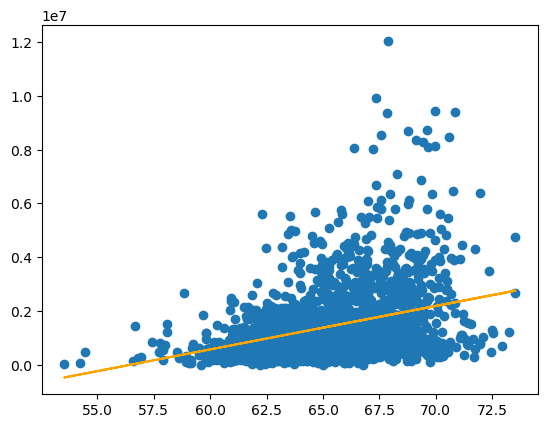

In [45]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

a, b = best_fit(X_one_variable, y)

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X_one_variable, y)
yfit = [a + b * xi for xi in X_one_variable]
plt.plot(X_one_variable, yfit, color = 'orange')

In [46]:
# k = 10
# ss = SS()

a_range = np.linspace(0,50,100)

# avg_tr_score=[]
# avg_te_score=[]
X_scores = []

X_one_variable_reshaped = X_one_variable.reshape(-1, 1)

for a in a_range:
    rid_reg = Ridge(alpha=a)
    rid_reg.fit(X_one_variable_reshaped, y)
    X_scores.append(rid_reg.score(X_one_variable_reshaped, y))


In [47]:
print(X_scores)
max_score = np.max(X_scores)
print(max_score) # best R^2

[0.09910699434363857, 0.09910699418542501, 0.09910699371083476, 0.09910699291994429, 0.09910699181282856, 0.09910699038956383, 0.09910698865022582, 0.09910698659489026, 0.09910698422363307, 0.09910698153652986, 0.09910697853365602, 0.09910697521508782, 0.09910697158090054, 0.0991069676311701, 0.09910696336597191, 0.09910695878538145, 0.09910695388947488, 0.09910694867832726, 0.09910694315201451, 0.09910693731061204, 0.09910693115419511, 0.09910692468283977, 0.09910691789662096, 0.09910691079561462, 0.09910690337989592, 0.09910689564954056, 0.0991068876046236, 0.09910687924522066, 0.0991068705714071, 0.09910686158325832, 0.09910685228084959, 0.09910684266425618, 0.09910683273355392, 0.0991068224888173, 0.09910681193012216, 0.09910680105754366, 0.09910678987115684, 0.0991067783710371, 0.0991067665572597, 0.09910675442989969, 0.09910674198903213, 0.0991067292347324, 0.09910671616707556, 0.09910670278613698, 0.09910668909199105, 0.09910667508471349, 0.09910666076437913, 0.09910664613106324

In [48]:
ridge_dict = dict(zip(X_scores, a_range))
print(f"The best alpha value is: {ridge_dict[max_score]}")

The best alpha value is: 0.0


In [49]:
#Again we see that Ridge regression regularization is not necessary

In [50]:
alpha_0_score = []

In [51]:
rid_reg_0 = Ridge(alpha = 10)
rid_reg_0.fit(X_one_variable_reshaped, y)
alpha_0_score.append(rid_reg_0.score(X_one_variable_reshaped, y))

In [52]:
alpha_0_score

[0.09910693241067603]

In [53]:
rid_reg_0.coef_

array([161614.63734653])

In [54]:
rid_reg_0.intercept_

-9126754.899931978

In [55]:
# y = -9126754.90 + (161614.64 * xi)

In [56]:
# SSE = (OLS sum squared errors) + (Sum of coefficients squared)

In [57]:
golf3 = golf.sort_values('gir', ascending=True)
# X_sorted = golf['gir'].sort()
# golf3

In [58]:
y_values = []
for i in X_one_variable:
    y_values.append(rid_reg_0.predict(np.array(i).reshape(1, -1)))

In [59]:
y_values[0:9]


[array([2753537.09141168]),
 array([1898595.65984852]),
 array([1971322.24665446]),
 array([1992332.14950951]),
 array([1720819.55876733]),
 array([1300621.50166634]),
 array([2362429.66903307]),
 array([1998796.73500337]),
 array([1987483.71038911])]

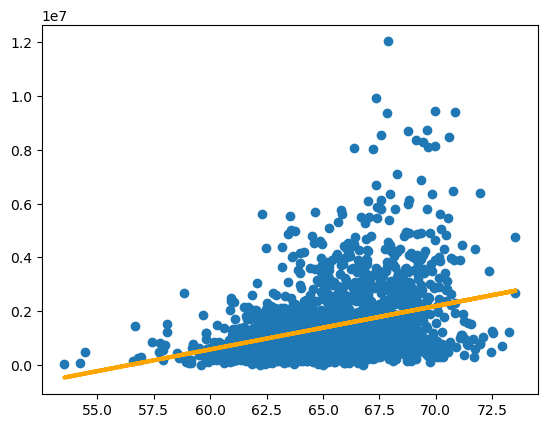

In [60]:
plt.scatter(X_one_variable, y)
yfit = [a + b * xi for xi in X_one_variable]
# plt.plot(X_one_variable, yfit, color = 'orange')
# plt.plot(X_one_variable, y_values, color = 'purple')
plt.plot(X_one_variable, y_values, color='orange',
     linewidth=3, markersize=1)

In [61]:
# Lets look to see if average putts has any possible relationship with earnings

In [62]:
new_X = golf["AVG_Putts"]

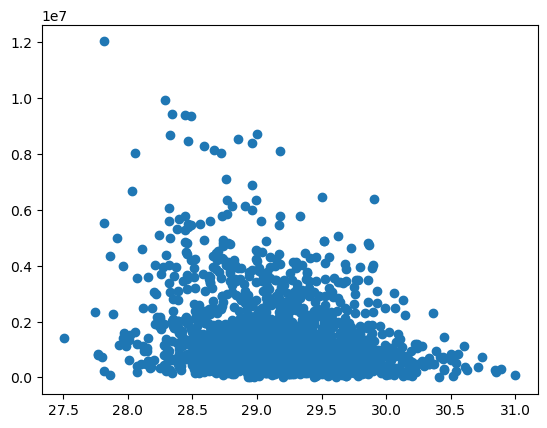

In [63]:
plt.scatter(new_X, y)

best fit line:
y = 21875751.77 + -699186.89x


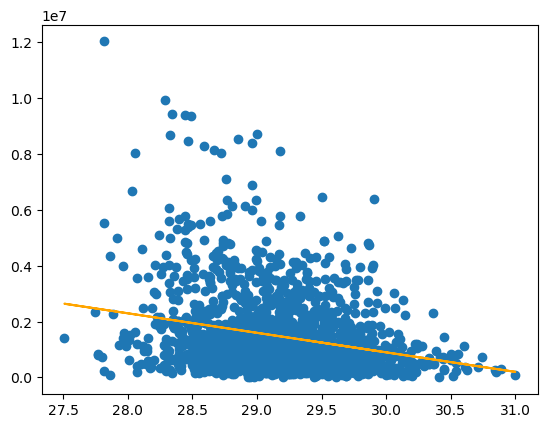

In [64]:
a2, b2 = best_fit(new_X, y)

plt.scatter(new_X, y)
yfit2 = [a2 + b2 * xi for xi in new_X]
plt.plot(new_X, yfit2, color = 'orange')

In [65]:
# As we would expect, the greater putts a player has, the less the earnings might be. Although we can see
# some correlation, it is not strong.

In [66]:
# Now we try to see if strokes gained approach has any correlation on earnings. Strokes gained approach
# shows the overall approach shot performance for each player. It focuses on measuring how far out
# the player was from the hole, how close the player hit the ball to, and ball lie type. It converts this to 
# one standard unit (strokes gained) to be compared to other aspects of the players game.

In [67]:
X_SG_APR = golf["SG:APR"]

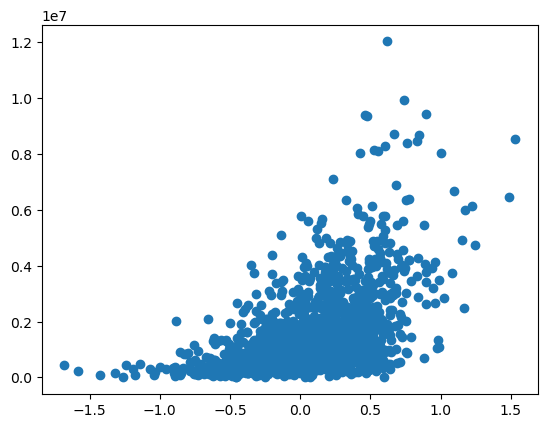

In [68]:
plt.scatter(X_SG_APR, y)

best fit line:
y = 1362395.02 + 1887841.29x


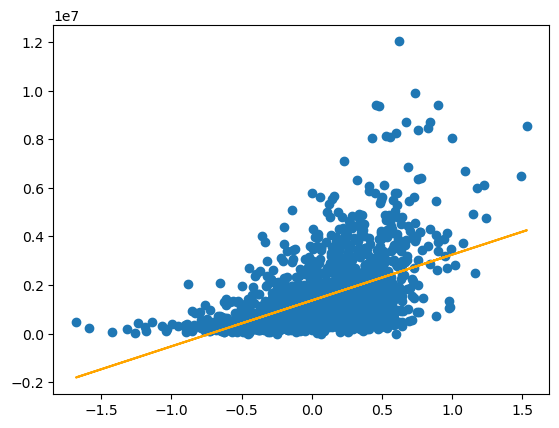

In [69]:
a3, b3 = best_fit(X_SG_APR, y)

import matplotlib.pyplot as plt
plt.scatter(X_SG_APR, y)
yfit3 = [a3 + b3 * xi for xi in X_SG_APR]
plt.plot(X_SG_APR, yfit3, color = 'orange')

In [70]:
a_range = np.linspace(0,0.005,100)


X_SG_APR_array = np.array(X_SG_APR).reshape(-1, 1)

X_scores_APR = []

for a in a_range:
    APR_rid_reg = Ridge(alpha=a)
    APR_rid_reg.fit(X_SG_APR_array, y)
    X_scores_APR.append(APR_rid_reg.score(X_SG_APR_array, y))
    

In [71]:
# print(X_scores_APR)
ridge_max_score_APR = np.max(X_scores_APR)
print(ridge_max_score_APR)

0.2599641442431505


In [72]:
ridge_dict = dict(zip(X_scores_APR, a_range))
ridge_dict[ridge_max_score_APR]

0.0

In [73]:
# Yet again, regularization is not needed here